Tensorflow에서 pretrained된 모델을 OpenCV에서 로드하여 작업 Object Detection 수행


Test

- SSD + Inception
-  SSD + MobileNet v3

In [1]:
# 입력 이미지
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-11-26 08:57:32--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2021-11-26 08:57:32 (10.4 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



## SSD+Inception

### Pretrained된 inference 모델(Frozen graph), Config 파일 다운로드

다운로드 url : https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

모델 : http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz 

Config : https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

In [2]:
!mkdir ./pretrained

!wget -O ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz 
!wget -O ./pretrained/ssd_config_01.pbtxt  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt

!tar -xvf ./pretrained/ssd_inception*.tar.gz -C ./pretrained 

--2021-11-26 09:01:17--  http://download.tensorflow.org/models/object_detection/ssd_inception_v2_coco_2017_11_17.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.11.128, 2607:f8b0:400c:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.11.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278126337 (265M) [application/x-tar]
Saving to: ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’

./pretrained/ssd_in 100%[===================>] 265.24M   126MB/s    in 2.1s    

2021-11-26 09:01:19 (126 MB/s) - ‘./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz’ saved [278126337/278126337]

--2021-11-26 09:01:19--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/ssd_inception_v2_coco_2017_11_17.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.c

In [3]:
!pwd
!ls -lia ./pretrained/ssd_inception*

/content
7208965 -rw-r--r-- 1 root   root 278126337 Nov 18  2017 ./pretrained/ssd_inception_v2_coco_2017_11_17.tar.gz

./pretrained/ssd_inception_v2_coco_2017_11_17:
total 201120
7208967 drwxr-x--- 3 275875 5000      4096 Nov 18  2017 .
7208964 drwxr-xr-x 3 root   root      4096 Nov 26 09:01 ..
7208975 -rw-r----- 1 275875 5000        77 Nov 18  2017 checkpoint
7208970 -rw-r----- 1 275875 5000 101987441 Nov 18  2017 frozen_inference_graph.pb
7208971 -rw-r----- 1 275875 5000 100214372 Nov 18  2017 model.ckpt.data-00000-of-00001
7208968 -rw-r----- 1 275875 5000     18073 Nov 18  2017 model.ckpt.index
7208969 -rw-r----- 1 275875 5000   3701354 Nov 18  2017 model.ckpt.meta
7208972 drwxr-x--- 3 275875 5000      4096 Nov 18  2017 saved_model


### dnn의 readNetFrom Tensorflow()로 inference 모델 로딩

In [4]:
import cv2

cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/ssd_inception_v2_coco_2017_11_17/frozen_inference_graph.pb',
                                       '/content/pretrained/ssd_config_01.pbtxt')

In [5]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [7]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/data/beatles01.jpg')

# 원본 이미지 (633, 806)를 (300, 300)크기로 resize  
# 이후 결과가 출력되면 resize된 이미지를 기반으로 bounding box 위치가 예측 되므로 원본 이미지 shape정보 저장
rows = img.shape[0]
cols = img.shape[1]
 
draw_img = img.copy()

# 원본 이미지 배열을 사이즈 (300, 300)으로, BGR을 RGB로 변환하여 배열 입력
cv_net.setInput(cv2.dnn.blobFromImage(img,  size=(300, 300), swapRB=True, crop=False))

# Object Detection 수행하여 결과를 cv_out으로 반환 
cv_out = cv_net.forward()

In [8]:
print(cv_out.shape)

(1, 1, 100, 7)


person: 0.9696 1
person: 0.9660 1
person: 0.8916 1
person: 0.6298 1
car: 0.8609 3
car: 0.7223 3
car: 0.7184 3
car: 0.7095 3
car: 0.5949 3
car: 0.5511 3


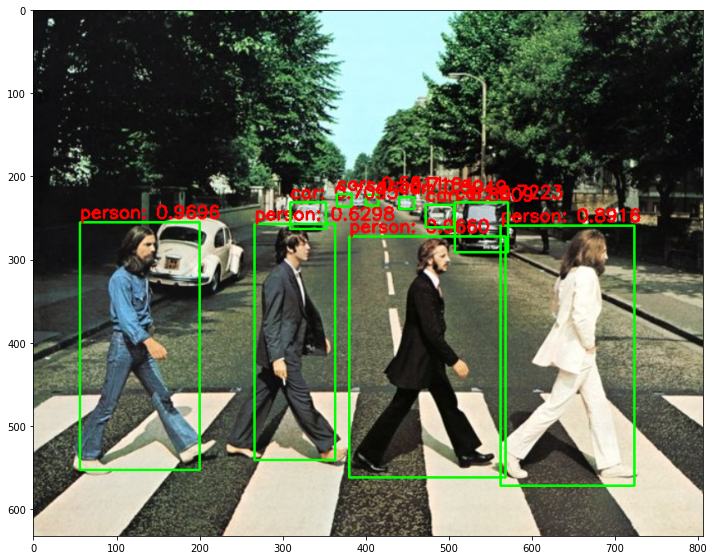

In [11]:
green_color=(0, 255, 0)
red_color=(0, 0, 255)

for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    if score > 0.4:
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows

        caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
        print(caption, class_id)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [12]:
import time

def get_detected_img(cv_net, img_array, score_threshold, is_print=True):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = img_array.copy()
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, size=(300, 300), swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)


    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        if score > score_threshold:
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 2)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

Detection 수행시간: 0.36 초


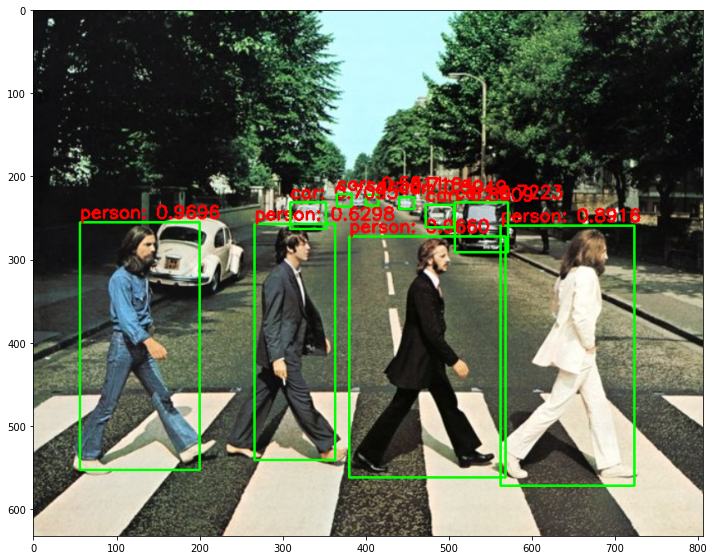

In [13]:
img = cv2.imread('/content/data/beatles01.jpg')
draw_img = get_detected_img(cv_net, img, score_threshold=0.4, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

--2021-11-26 09:12:42--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.01s   

2021-11-26 09:12:42 (5.55 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]

Detection 수행시간: 0.39 초


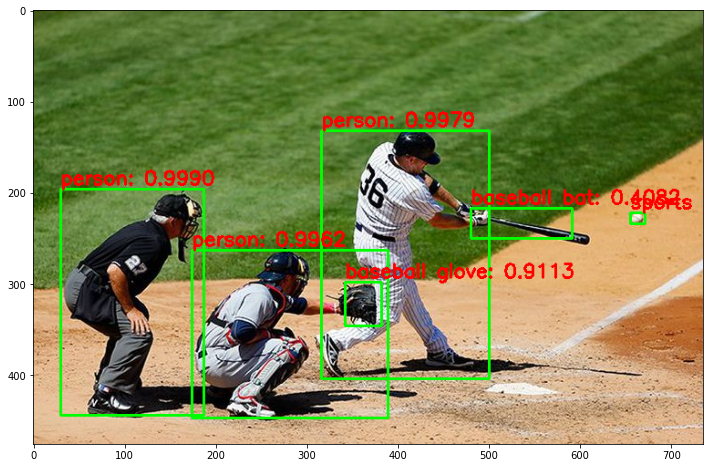

In [14]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

img = cv2.imread('/content/data/baseball01.jpg')
draw_img = get_detected_img(cv_net, img, score_threshold=0.4, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [15]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-11-26 09:17:01--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-11-26 09:17:01--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-11-26 09:17:01--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [16]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)

    vid_writer.release()
    cap.release()

In [17]:
do_detected_video(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_incept.mp4', 0.2, False)

총 Frame 갯수: 58
Detection 수행시간: 0.38 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.39 초
Detection 수행시간: 0.39 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.39 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.38 초
Detection 수행시간: 0.36 초
Detection 수행시간: 0.37 초
Detection 수행시간: 0.3

## SSD + MobileNet v3

In [18]:
!mkdir ./pretrained
!wget -O ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
!wget -O ./pretrained/ssd_config_02.pbtxt https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt

!!tar -xvf ./pretrained/ssd_mobilenet*.tar.gz -C ./pretrained 

mkdir: cannot create directory ‘./pretrained’: File exists
--2021-11-26 09:18:17--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.11.128, 2607:f8b0:400c:c01::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.11.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

./pretrained/ssd_mo 100%[===================>]  47.03M  97.1MB/s    in 0.5s    

2021-11-26 09:18:18 (97.1 MB/s) - ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

--2021-11-26 09:18:18--  https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
Resolving gist.githubusercontent.com (gist.githubusercontent.c

['ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite',
 'ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
 'ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta',
 'ssd_mobilenet_v3_large_coco_2020_01_14/']

In [19]:
print(cv2.__version__)

4.1.2


In [1]:
# 버전 업그레이드 후 dnn_DetectionModel()사용
!pip install opencv-python==4.5.2.54

참고 : https://github.com/opencv/opencv/pull/16760

In [2]:
import cv2

cv_net_m = cv2.dnn_DetectionModel('/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                                  '/content/pretrained/ssd_config_02.pbtxt')
cv_net_m.setInputSize(320, 320)
cv_net_m.setInputScale(1.0 / 127.5)
cv_net_m.setInputMean((127.5, 127.5, 127.5))
cv_net_m.setInputSwapRB(True)

<dnn_Model 0x7f6f04045e90>

In [3]:
img = cv2.imread('/content/data/beatles01.jpg')
draw_img = img.copy()

classes, confidences, boxes = cv_net_m.detect(img, confThreshold=0.5)  # bbox 좌표값은 정수형의 위치 좌표, (xmin, ymin, w, h)

In [4]:
classes, confidences, boxes

(array([[1],
        [1],
        [1],
        [1],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [1]], dtype=int32), array([[0.7795709 ],
        [0.7573837 ],
        [0.75332576],
        [0.71246046],
        [0.6756758 ],
        [0.6396257 ],
        [0.5794208 ],
        [0.5773531 ],
        [0.553491  ],
        [0.5314793 ],
        [0.50632125]], dtype=float32), array([[ 48, 258, 154, 291],
        [213, 252, 158, 298],
        [386, 266, 167, 300],
        [560, 251, 153, 322],
        [496, 226,  80,  67],
        [451, 227,  28,  21],
        [472, 226,  43,  35],
        [375, 219,  17,  17],
        [415, 220,  18,  17],
        [314, 227,  38,  23],
        [258, 259, 101, 268]], dtype=int32))

In [5]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

person: 0.7796 1 [ 48 258 154 291]
person: 0.7574 1 [213 252 158 298]
person: 0.7533 1 [386 266 167 300]
person: 0.7125 1 [560 251 153 322]
car: 0.6757 3 [496 226  80  67]
car: 0.6396 3 [451 227  28  21]
car: 0.5794 3 [472 226  43  35]
car: 0.5774 3 [375 219  17  17]
car: 0.5535 3 [415 220  18  17]
car: 0.5315 3 [314 227  38  23]
person: 0.5063 1 [258 259 101 268]


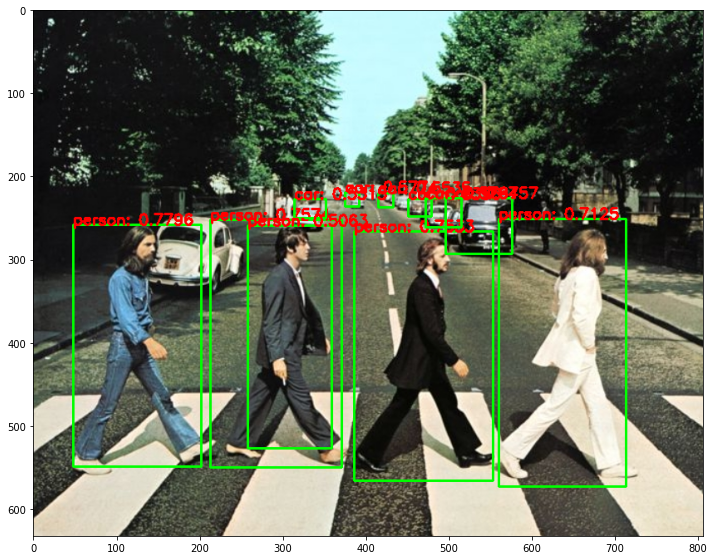

In [6]:
import matplotlib.pyplot as plt

green_color=(0, 255, 0)
red_color=(0, 0, 255)

for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
    if confidence_score > 0.5:
      caption = "{}: {:.4f}".format(labels_to_names[class_id], confidence_score)
      cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
      cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
      print(caption, class_id, box)  

draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [7]:
import time 
def get_detected_img_renew(cv_net, img_array, score_threshold, is_print=True):
    
    draw_img = img_array.copy()
   
    start = time.time()

    classes, confidences, boxes = cv_net.detect(img_array, confThreshold=0.5)
  
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
        if confidence_score > 0.5:
            caption = "{}: {:.4f}".format(labels_to_names[class_id], confidence_score)
            cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
            print(caption)
  
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

In [9]:
## dnn_Model 객체 생성
def get_cv_detection_model(pretrained_path, config_path):
  cv_net = cv2.dnn_DetectionModel(pretrained_path, config_path)
  cv_net.setInputSize(320, 320)
  cv_net.setInputScale(1.0 / 127.5)
  cv_net.setInputMean((127.5, 127.5, 127.5))
  cv_net.setInputSwapRB(True)

  return cv_net

In [10]:
cv_net_m = get_cv_detection_model('/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                                  '/content/pretrained/ssd_config_02.pbtxt')

person: 0.7796
person: 0.7574
person: 0.7533
person: 0.7125
car: 0.6757
car: 0.6396
car: 0.5794
car: 0.5774
car: 0.5535
car: 0.5315
person: 0.5063
Detection 수행시간: 0.14 초


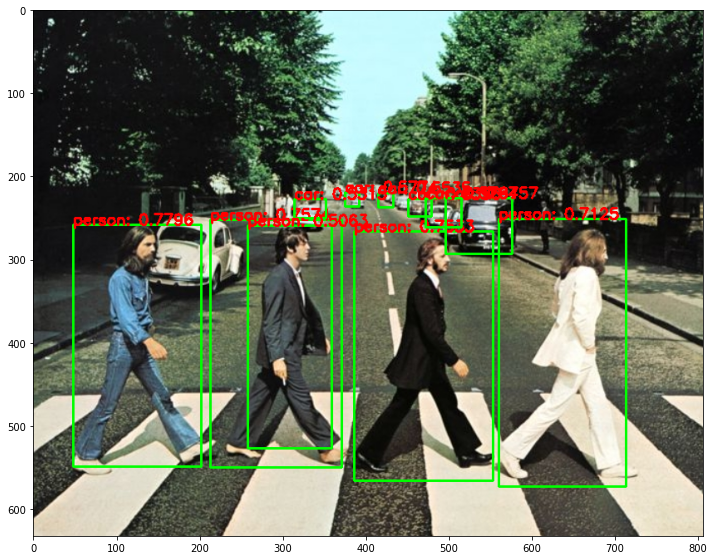

In [11]:
img = cv2.imread('./data/beatles01.jpg') 
draw_img = get_detected_img_renew(cv_net_m, img, score_threshold=0.5,  is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

--2021-11-26 09:24:46--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.01s   

2021-11-26 09:24:47 (5.94 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]

person: 0.8579
person: 0.8535
person: 0.8509
baseball glove: 0.6942
sports ball: 0.5895
baseball bat: 0.5015
Detection 수행시간: 0.11 초


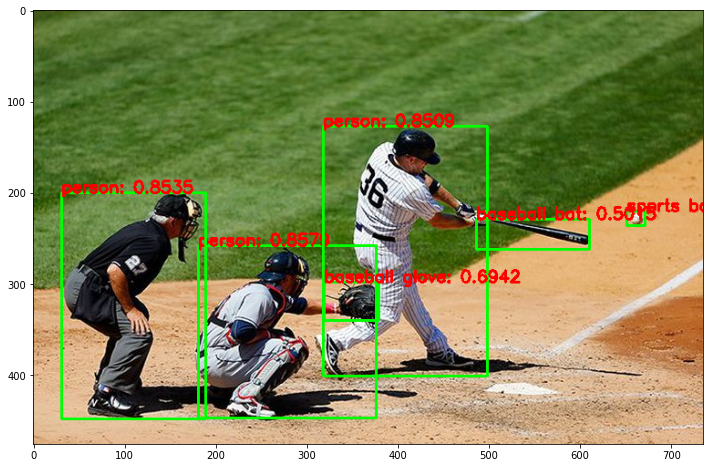

In [12]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

img = cv2.imread('./data/baseball01.jpg')
draw_img = get_detected_img_renew(cv_net_m, img, score_threshold=0.5,  is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [13]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-11-26 09:24:57--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-11-26 09:24:57--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-11-26 09:24:57--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [14]:
def do_detected_video_renew(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img_renew(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [15]:
do_detected_video_renew(cv_net_m, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_m3.mp4', 0.2, False)

총 Frame 갯수: 58
car: 0.7007
car: 0.6426
person: 0.6268
car: 0.5965
car: 0.5591
car: 0.5143
car: 0.5111
person: 0.5018
Detection 수행시간: 0.11 초
car: 0.6978
car: 0.6462
person: 0.6340
car: 0.5995
car: 0.5576
car: 0.5123
car: 0.5123
person: 0.5040
Detection 수행시간: 0.12 초
person: 0.7225
car: 0.7070
car: 0.7001
car: 0.5805
car: 0.5615
Detection 수행시간: 0.11 초
person: 0.7266
car: 0.7232
car: 0.6871
car: 0.5425
car: 0.5372
car: 0.5029
Detection 수행시간: 0.12 초
car: 0.6832
car: 0.6009
person: 0.5702
bus: 0.5572
car: 0.5494
truck: 0.5315
Detection 수행시간: 0.12 초
person: 0.6666
car: 0.6634
car: 0.5647
car: 0.5450
bus: 0.5379
car: 0.5267
car: 0.5088
Detection 수행시간: 0.13 초
car: 0.6620
person: 0.6544
car: 0.5694
bus: 0.5468
car: 0.5366
car: 0.5303
car: 0.5074
Detection 수행시간: 0.12 초
car: 0.7102
bus: 0.6212
car: 0.5881
person: 0.5652
car: 0.5506
car: 0.5125
person: 0.5110
Detection 수행시간: 0.13 초
car: 0.6820
car: 0.6173
bus: 0.5815
person: 0.5728
car: 0.5602
Detection 수행시간: 0.12 초
car: 0.6922
car: 0.6200
bus: 0.5